In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

#Set seeds to make the experiment more reproducible
from numpy.random import seed
tensorflow.random.set_seed(1)
seed(1)

train=pd.read_csv('C:\\Users\\pc\\Desktop\\train_set.csv',encoding="cp949")
train

,DATETIME,FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3,...,FM.19,PU1.19,PU2.19,TE1.19,TE2.19,TE3.19,P1.19,P2.19,P3.19,P4.19
0,2014-01-01 0:00,347,0,80,52.1,59.6,53.7,4.5,5.2,5.1,...,0,76,0,53.7,58.6,56.6,5.5,5.7,5.6,6.6
1,2014-01-01 1:00,387,0,80,52.0,59.6,55.9,4.4,5.2,5.2,...,0,78,0,54.0,58.7,56.5,5.4,5.6,5.5,6.4
2,2014-01-01 2:00,389,0,80,51.8,59.7,54.4,4.4,5.2,5.1,...,0,75,0,53.8,58.9,57.0,5.5,5.6,5.6,6.5
3,2014-01-01 3:00,354,0,80,52.0,59.7,52.7,4.6,5.1,5.0,...,0,75,0,54.2,57.9,56.5,5.5,5.6,5.5,6.5
4,2014-01-01 4:00,374,0,80,51.9,59.7,53.7,4.6,5.2,5.1,...,0,75,0,53.7,59.1,56.9,5.5,5.6,5.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26259,2016-12-31 19:00,4,0,0,30.3,33.8,28.1,2.7,2.7,2.7,...,0,0,0,61.9,20.5,22.7,4.5,4.6,4.5,5.9
26260,2016-12-31 20:00,4,0,0,29.2,32.6,26.8,2.7,2.7,2.7,...,0,0,0,61.8,20.6,22.8,4.5,4.6,4.5,5.9
26261,2016-12-31 21:00,4,0,0,28.1,31.5,25.8,2.7,2.7,2.7,...,0,0,0,61.8,20.7,22.9,4.5,4.6,4.5,6.0
26262,2016-12-31 22:00,4,0,0,27.2,30.5,24.9,2.7,2.7,2.7,...,0,0,0,61.9,20.8,23.0,4.5,4.6,4.5,5.9


In [8]:
test=pd.read_csv('C:\\Users\\pc\\Desktop\\test_set.csv',encoding="cp949")
test

,DATETIME,FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3,...,FM.19,PU1.19,PU2.19,TE1.19,TE2.19,TE3.19,P1.19,P2.19,P3.19,P4.19
0,2017-01-01 0:00,4,0,0,25.7,28.6,23.6,2.7,2.7,2.7,...,0,0,0,61.9,20.9,23.1,4.5,4.6,4.5,5.8
1,2017-01-01 1:00,4,0,0,25.1,27.8,23.2,2.7,2.7,2.7,...,0,0,0,62.1,21.0,23.2,4.5,4.6,4.5,5.9
2,2017-01-01 2:00,4,0,0,24.6,27.0,22.7,2.7,2.7,2.7,...,0,0,0,62.0,21.1,23.3,4.6,4.6,4.6,5.8
3,2017-01-01 3:00,4,0,0,24.1,26.3,22.3,2.7,2.7,2.7,...,0,0,0,62.0,21.2,23.3,4.6,4.6,4.5,5.9
4,2017-01-01 4:00,4,0,0,23.6,25.6,21.9,2.7,2.7,2.7,...,0,0,0,62.1,21.2,23.4,4.5,4.6,4.5,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,2017-12-30 20:00,4,0,0,59.2,58.8,30.2,4.7,4.7,4.7,...,0,0,0,17.1,18.7,16.0,5.1,5.1,5.1,5.1
8727,2017-12-30 21:00,4,0,0,59.0,58.5,29.8,4.5,4.6,4.5,...,0,0,0,17.2,18.8,16.2,5.1,5.1,5.1,5.1
8728,2017-12-30 22:00,4,0,0,58.8,58.5,29.0,4.7,4.7,4.6,...,0,0,0,17.3,18.9,16.3,5.1,5.1,5.1,5.1
8729,2017-12-30 23:00,4,0,0,59.3,58.9,28.3,4.7,4.8,4.7,...,0,0,0,17.4,19.0,16.4,5.1,5.1,5.1,5.1


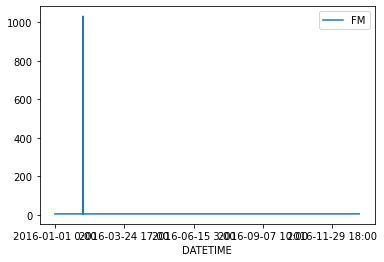

In [15]:
daily_FM=train.groupby('DATETIME',as_index=False)['FM'].sum()
daily_FM.index=daily_FM['DATETIME']
daily_FM.set_index('DATETIME', inplace=True)
daily_FM.plot()
plt.show()

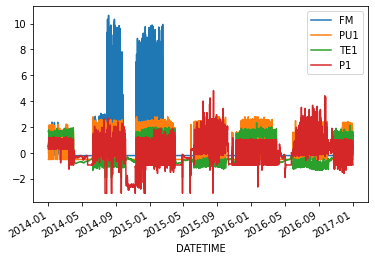

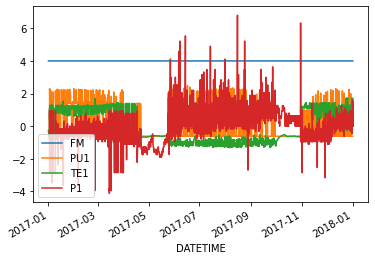

NameError: name 'tp_df' is not defined

In [49]:
# https://blog.naver.com/chromatic_365/222657670527
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymysql
import matplotlib as mpl

# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query = "select DATETIME, FM, PU1, TE1, P1 from wholeData where DATETIME between '2014-01-01 00:00:00' and '2016-12-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

tp=pd.DataFrame(db_export)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query = "select DATETIME, FM, PU1, TE1, P1 from wholeData where DATETIME between '2014-01-01 00:00:00' and '2016-12-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

train=pd.DataFrame(db_export)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

# scaling
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['FM','PU1', 'TE1', 'P1']

train_df=standard_scaling(train, scale_columns)

train_df.index=train_df['DATETIME']
train_df.set_index('DATETIME', inplace=True)
train_df.plot()
plt.show()

query = "select DATETIME, FM, PU1, TE1, P1 from wholeData where DATETIME between '2017-01-01 00:00:00' and '2017-12-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

test=pd.DataFrame(db_export)

# scaling
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['PU1', 'TE1', 'P1']

test_df=standard_scaling(test, scale_columns)

test_df.index=test_df['DATETIME']
test_df.set_index('DATETIME', inplace=True)
test_df.plot()
plt.show()

# 5. Train/Valudation Split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리한다.
# 'PU1'를 제외한 칼럼들은 x
x=tp_df[tp_df.columns.difference(['PU1'])]

y=tp_dp['PU1']

# 검증(test)는 20%로 한다. = test_size=0.2
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=19)

In [30]:
def series_to_supervised(data,window=1,lag=1,dropnan=True):
    cols,names=list(),list()
    # input sequence (t-n,...t-1)
    for i in range(window,0,-1):
        cols.append(data.shift(i))
        names+=[('%s(t-%d)' % (col,i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names+=[('%s(t)'%(col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names+=[('%s(t+%d)'%(col,lag)) for col in data.columns]
    # Put it all together
    agg=pd.concat(cols,axis=1)
    agg.columns=names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

train_gp=train.sort_values('DATETIME').groupby(['FM','PU1','TE1','P1'],as_index=False)
train_gp=train_gp.agg({'FM':['mean']})
train_gp.columns=['FM','PU1','TE1','P1']

window=29
lag=1
series=series_to_supervised(train_gp.drop('DATETIME',axis=1),window=window,lag=lag)

last_FM='FM(t-%d)'%window
last_PU1='PU1(t-%d)'%window
last_TE1='TE1(t-%d)'%window
last_P1='P1(t-%d)'%window
series=series[(series['FM(t)']==series[last_FM])]
series=series[(series['PU1(t)']==series[last_PU1])]
series=series[(series['TE1(t)']==series[last_TE1])]
series=series[(series['P1(t)']==series[last_P1])]

columns_to_drop=[('%s(t+%d)'%(col,lag)) for col in ['item','store']]
for i in range(window,0,-1):
    columns_to_drop+=[('%s(t-%d)'%(col,i)) for col in ['item','store']]
series.drop(columns_to_drop,axis=1,inplace=True)
series.drop(['item(t)','store(t)'],axis=1,inplace=True)

KeyError: "['DATETIME'] not found in axis"

In [20]:
pd.set_option('display.max_columns',15)
series

NameError: name 'series' is not defined

In [53]:
# https://blog.naver.com/chromatic_365/222657670527
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymysql
import matplotlib as mpl

# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query = "select DATETIME, PU1, TE1, P1 from wholeData where DATETIME between '2014-01-01 00:00:00' and '2016-12-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

tp=pd.DataFrame(db_export)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

# scaling
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['PU1', 'TE1', 'P1']

tp_df=standard_scaling(test, scale_columns)
tp_df

tp_df.index=tp_df['DATETIME']
tp_df.set_index('DATETIME', inplace=True)
tp_df.plot()
plt.show()

# 5. Train/Valudation Split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리한다.
# 'PU1'를 제외한 칼럼들은 x
x=tp_df[tp_df.columns.difference(['PU1'])]

y=tp_dp['PU1']

# 검증(test)는 20%로 한다. = test_size=0.2
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=19)

KeyError: 'DATETIME'